In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

sns.set_context('talk')

np.random.seed(123)

#Generate data set as normal distribution N(0,1)
data = np.random.randn(100)
print("Mean(sd) of data: %.2f (%.2f)"% (np.average(data),np.std(data)))


mean(sd) of data: 0.03 (1.13)


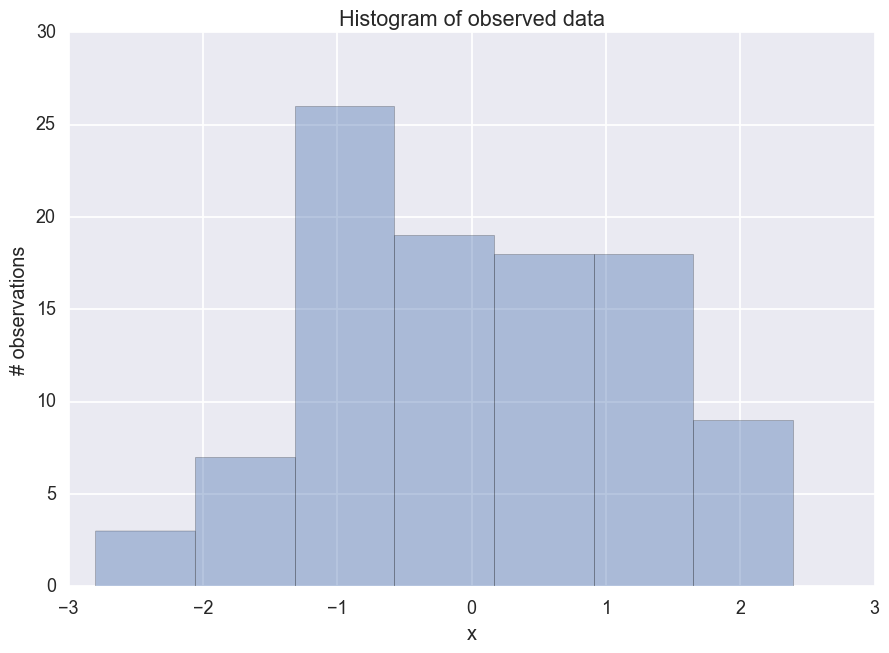

In [2]:
#Plot the distribution of the data using seaborn
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

In [3]:
#Build the model and run the MCMC (with parallel chains)
with pm.Model():
    #Prior for mu
    mu = pm.Normal('mu', 0, 1)
    #mu = pm.Uniform('mu', lower=-1, upper=1)
    
    #Prior for sigma
    sigma = pm.Uniform('sigma', lower=0.5, upper=2.0)
    #sigma = pm.InverseGamma('sigma',0.001,0.00001)
    
    #Likelihood/model
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step, njobs=4, start=[{'mu':0+.25*np.random.randn(),'sigma':1+.25*np.random.randn(),} for j in range(4)])
    
burnin=1000

100%|██████████| 20000/20000 [00:05<00:00, 3366.13it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e34bb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e527e80>]], dtype=object)

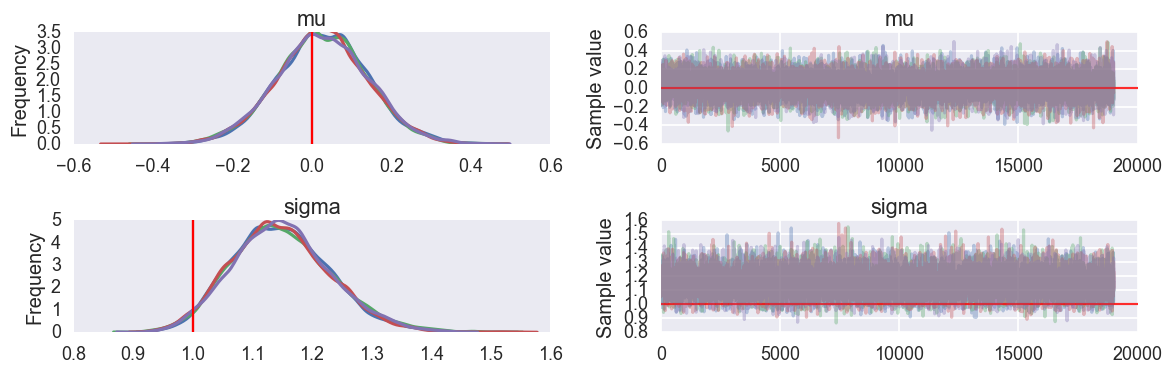

In [4]:
#Plot distributions and traces for mu and sigma
pm.traceplot(trace[burnin:], lines = {'mu':0, 'sigma':1})

{'sigma': 1.0000420545662054, 'mu': 1.0000312757055876, 'sigma_interval_': 1.0000400507421563}


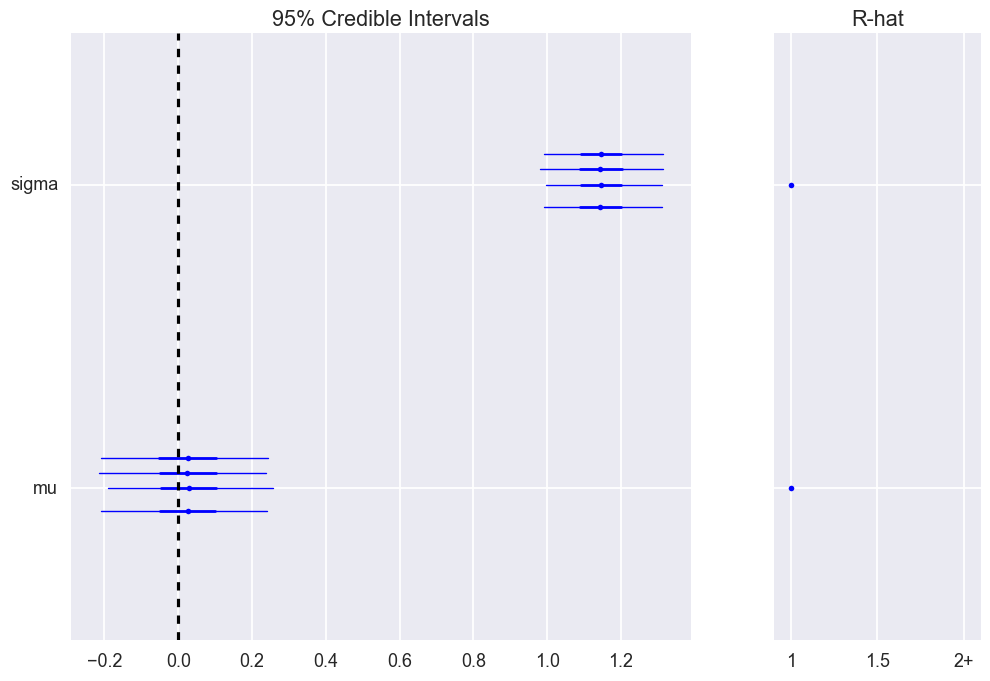

In [5]:
#Let's check for convergence by analyzing the four chains
pm.forestplot(trace[burnin:],varnames={'mu','sigma'})
print(pm.gelman_rubin(trace[burnin:]))

In [6]:
#Notice the MC Error size
pm.summary(trace[burnin:])


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.026            0.114            0.001            [-0.210, 0.243]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.201         -0.050         0.026          0.102          0.254


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.149            0.083            0.001            [0.990, 1.312]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.999          1.091          1.144          1.201          1.325



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200a39e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f0aef60>]], dtype=object)

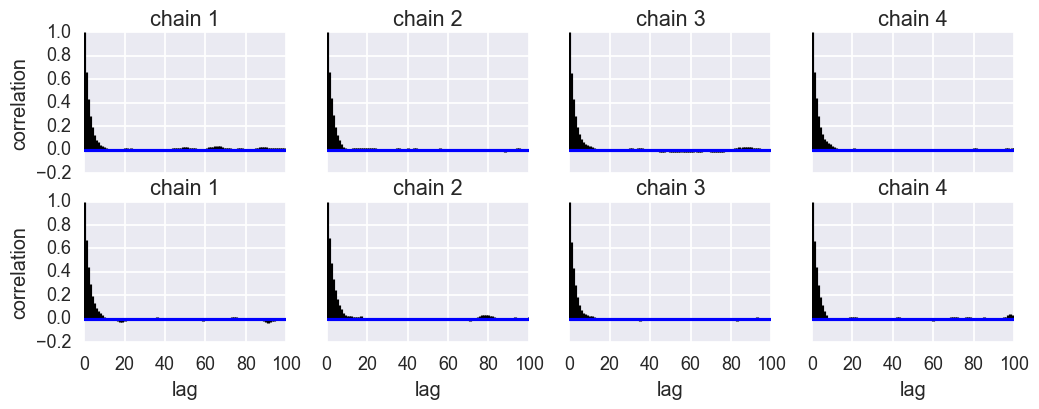

In [7]:
#Check for autocorrelation
pm.autocorrplot(trace[burnin:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12143eeb8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121614198>], dtype=object)

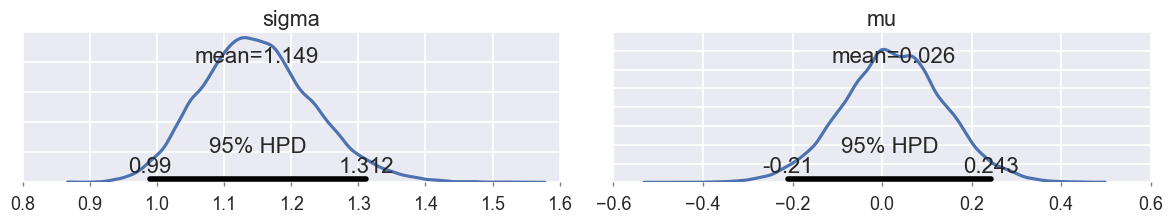

In [8]:
#Plot the posterior with credible intervals (HPD=Highest Posterior Density)
pm.plot_posterior(trace[burnin:], kde_plot=True)

/Users/bassm/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


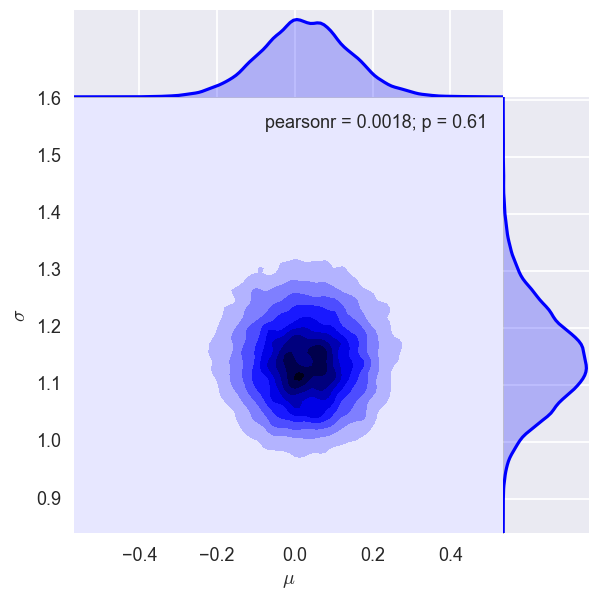

In [9]:
#Plot joint posterior distribution
jg=sns.jointplot(trace[burnin:]['mu'],trace[burnin:]['sigma'],kind="kde", color="b", space=0)\
    .set_axis_labels("$\mu$","$\sigma$")\
    .plot_joint(sns.kdeplot, zorder=0, n_levels=6)
